# Mini Project: Different Methods of Sentiment Analysis 
## Import packages

In [1]:
!pip install bs4 
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from gensim.models import word2vec, Word2Vec
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score,cross_val_predict
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve,auc,precision_recall_curve
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from wordcloud import WordCloud, STOPWORDS

## Load dataset

In [2]:
# Uploading training data and testing data
train_data = pd.read_csv('labeledTrainData.tsv',  delimiter="\t", quoting=3)
test_data = pd.read_csv('testData.tsv', delimiter = "\t", quoting= 3 )
unlabeled_train = pd.read_csv('unlabeledTrainData.tsv', delimiter = "\t", quoting= 3 )
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
# check if NULL in dataset
train_data.isnull().any()
test_data.isnull().any()

id        False
review    False
dtype: bool

## data preprocessing

In [4]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/wyx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
def review_to_words(review, string = True, remove_stopwords=True):
    # Remove HTML
    review_text = BeautifulSoup(review).get_text()
    # Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    # Convert words to lower case and split them
    words = review_text.lower().split()
    # Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        words = [stemmer.stem(w) for w in words]
    if string:
        return " ".join(words)
    else:
        return words

In [6]:
# def review_to_words(review, remove_stopwords=False):
#     '''Function to convert a document to a sequence of words,
#     optionally removing stop words.  Returns a list of words.
#     '''
#     # 1. Remove HTML
#     review_text = BeautifulSoup(review).get_text()
      
#     # 2. Remove non-letters
#     review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
#     # 3. Convert words to lower case and split them
#     words = review_text.lower().split()
    
#     # 4. Optionally remove stop words (false by default)
#     if remove_stopwords:
#         stops = set(stopwords.words("english"))
#         words = [w for w in words if not w in stops]
    
#     # 4. Optionally remove stop words (false by default)
#     stemming_words = [stemmer.stem(w) for w in words]
    
#     # 5. Return final words
#     return ' '.join(stemming_words)

In [7]:
# Get the number of reviews based on the dataframe column size
num_reviews = train_data["review"].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 

print("Cleaning and parsing the training set movie reviews...\n")
for i in range( 0, num_reviews ):
    # If the index is evenly divisible by 1000, print a message
    if((i+1)%1000 == 0):
        print(f"Review {i+1} of {num_reviews}\n")                                                                    
    clean_train_reviews.append(review_to_words(train_data["review"][i]))
print("Finished cleaning and parsing the training set movie reviews...\n")

Cleaning and parsing the training set movie reviews...

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000

Finished cleaning and parsing the training set movie reviews...



In [8]:
# Create an empty list and append the clean reviews one by one
num_reviews = len(test_data["review"])
clean_test_reviews = [] 

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test_data["review"][i] )
    clean_test_reviews.append(clean_review)
print("Finished cleaning and parsing the test set movie reviews...\n")

Cleaning and parsing the test set movie reviews...

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000

Finished cleaning and parsing the test set movie reviews...



In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data=None, backgroundcolor='white', width=800, height=600):
    wordcloud = WordCloud(stopwords=STOPWORDS,
                         background_color=backgroundcolor,
                         width=width, height=height).generate(data)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

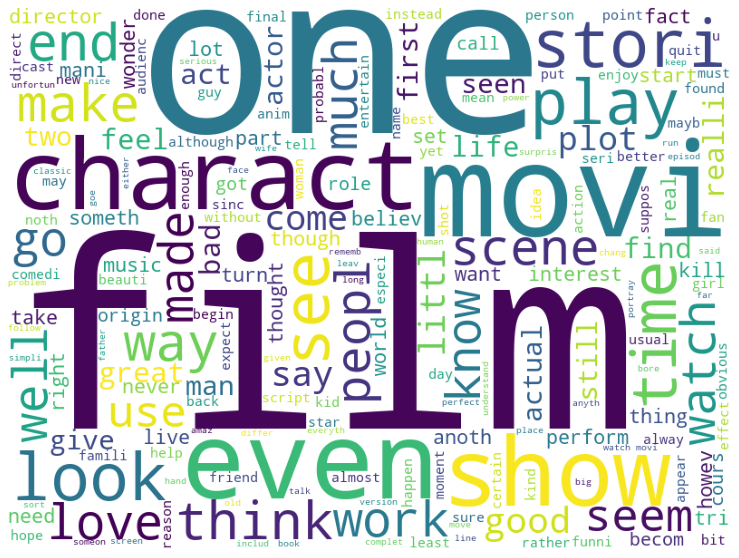

In [10]:
displayWordCloud(' '.join(clean_train_reviews))

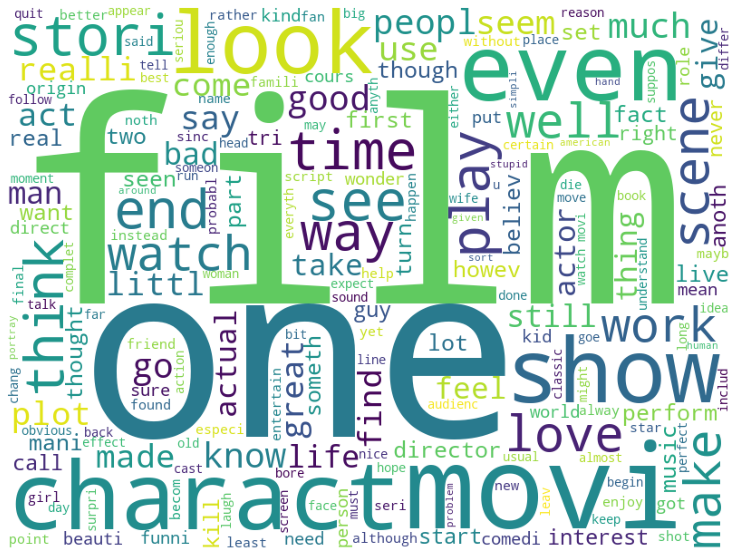

In [11]:
displayWordCloud(' '.join(clean_test_reviews))

In [74]:
positive_id=[]
negative_id=[]
for i in range(0,len(train_data)):
    if train_data["sentiment"][i] == 1:
        positive_id.append(i)
    else:
        negative_id.append(i)

clean_pos = list(np.array(clean_train_reviews)[positive_id])
clean_neg = list(np.array(clean_train_reviews)[negative_id])

p=[] #count positive
for i in range(0,len(clean_pos)):
    num=len(str(clean_pos[i]))
    p.append(num)



n=[] #count negative
for i in range(0,len(clean_neg)):
    num=len(str(clean_neg[i]))
    n.append(num)


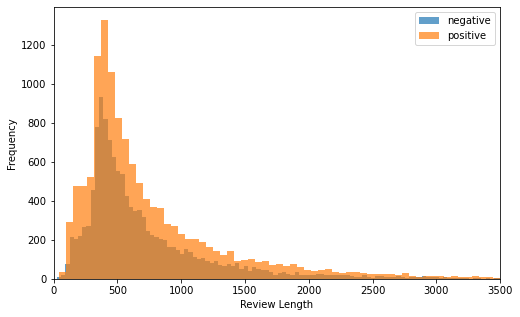

In [75]:
fig = plt.figure(figsize=(8,5))
plt.hist(n,150,alpha=0.7,label='negative')
plt.hist(p,150,alpha=0.7,label='positive')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.xlim(0,3500)
plt.legend()
plt.savefig('Frequency.png')
plt.show()

## Feature Extracting
### Bag of words model

In [12]:
# because we don't have labeledTestData, split labeledTrainData as training set and tesing set

x_train, x_test, y_train, y_test = train_test_split(clean_train_reviews, train_data['sentiment'],test_size = 0.3,random_state = 0)

In [47]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000,ngram_range=(1,4)) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
print("Creating the bag of words...\n")
# train_data_features = vectorizer.fit_transform(x_train)
all_train_data_features1 = vectorizer.fit_transform(clean_train_reviews).toarray()

Creating the bag of words...



In [48]:
# print("Shape of Bag of Words~: ", train_data_features.shape)
# print("Example review: ",clean_train_reviews[5])
# print("Related Bag of Words:\n",train_data_features[5])

In [49]:
# Numpy arrays are easy to work with, so convert the result to an 
# array
# train_data_features_array = train_data_features.toarray()
# vocab = vectorizer.get_feature_names()

In [50]:
# Get a bag of words for the test set, and convert to a numpy array
# test_data_features = vectorizer.transform(x_test)
# test_data_features = test_data_features.toarray()
all_test_data_features1 = vectorizer.transform(clean_test_reviews)

### TF_IDF model

In [62]:
tfidf_transformer = TfidfVectorizer(analyzer = 'word',ngram_range=(1,4),max_features=5000)
print("Creating the TF_IDF...\n")
# train_data_features2 = tfidf_transformer.fit_transform(x_train)
all_train_data_features2 = tfidf_transformer.fit_transform(clean_train_reviews).toarray()

Creating the TF_IDF...



In [63]:
# train_data_features_array2 = train_data_features2.toarray()
# vocab = tfidf_transformer.get_feature_names()

In [64]:
# Get a bag of words for the test set, and convert to a numpy array
# test_data_features2 = tfidf_transformer.transform(x_test)
# test_data_features2 = test_data_features2.toarray()
all_test_data_features2 = tfidf_transformer.transform(clean_test_reviews).toarray()

### Word2Vec

In [20]:
import nltk.data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/wyx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [22]:
def review_to_sentences(review, tokenizer, remove_stopwords=False):
    '''Function to split a review into parsed sentences. Returns a 
    list of sentences, where each sentence is a list of words
    '''
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append(review_to_words(raw_sentence, remove_stopwords))
    
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

def review_to_wordlist(review, remove_stopwords=False):
    '''Function to convert a document to a sequence of words,
    optionally removing stop words.  Returns a list of words.
    '''
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
      
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    # 5. Return a list of words
    return(words)

In [23]:
sentences = []  # Initialize an empty list of sentences

print("Parsing sentences from training set")
for review in train_data["review"]:
    sentences += review_to_sentences(review, tokenizer)

print("Parsing sentences from unlabeled set")
for review in unlabeled_train["review"]:
    sentences += review_to_sentences(review, tokenizer)
print("Finished parsing sentences from unlabeled set")

In [24]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [25]:
# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

In [26]:
# Initialize and train the model (this will take some time)
print("Training model...")
model = word2vec.Word2Vec(sentences,
                          workers=num_workers,
                          size=num_features,
                          min_count = min_word_count,
                          window = context,
                          sample = downsampling)
print("Finished training model.")

In [27]:
# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)
# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

In [28]:
model = word2vec.Word2Vec.load("300features_40minwords_10context")

2021-04-30 16:46:11,497 : INFO : loading Word2Vec object from 300features_40minwords_10context
2021-04-30 16:46:11,749 : INFO : loading wv recursively from 300features_40minwords_10context.wv.* with mmap=None
2021-04-30 16:46:11,750 : INFO : setting ignored attribute vectors_norm to None
2021-04-30 16:46:11,752 : INFO : loading vocabulary recursively from 300features_40minwords_10context.vocabulary.* with mmap=None
2021-04-30 16:46:11,752 : INFO : loading trainables recursively from 300features_40minwords_10context.trainables.* with mmap=None
2021-04-30 16:46:11,752 : INFO : setting ignored attribute cum_table to None
2021-04-30 16:46:11,753 : INFO : loaded 300features_40minwords_10context


In [29]:
def makeFeatureVec(words, model, num_features):
    '''Function to average all of the word vectors in a given
    paragraph'''
    
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
     
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.wv.index2word)
    
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
     
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec

def getAvgFeatureVecs(reviews, model, num_features):
    '''Given a set of reviews (each one a list of words), calculate 
    the average feature vector for each one and return a 2D numpy array '''
     
    # Initialize a counter
    counter = 0
    
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    
    # Loop through the reviews
    for review in reviews:
       # Print a status message every 1000th review
       if counter%1000 == 0:
            print(f"Review {counter} of {len(reviews)}")
            
       # Call the function (defined above) that makes average feature vectors
       reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
        
       # Increment the counter
       counter = counter + 1
        
    return reviewFeatureVecs

In [30]:
# Calculate average feature vectors for training and testing sets,
# using the functions we defined above. Notice that we now use stop word
# removal.

new_clean_train_reviews = []
for review in train_data["review"]:
    new_clean_train_reviews.append(review_to_wordlist(review, remove_stopwords=True))

trainDataVecs = getAvgFeatureVecs(new_clean_train_reviews, model, num_features)

print("Creating average feature vecs for test reviews")
new_clean_test_reviews = []
for review in test_data["review"]:
    new_clean_test_reviews.append(review_to_wordlist(review,remove_stopwords=True))
print("Finished creating average feature vecs for test reviews")

testDataVecs = getAvgFeatureVecs(new_clean_test_reviews, model, num_features)

Review 0 of 25000


<ipython-input-29-087924ad73cb>:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  featureVec = np.add(featureVec,model[word])


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Creating average feature vecs for test reviews
Finished creating average feature vecs for test reviews
Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 2

In [31]:
clean_train_reviews2 = []
for review in x_train:
    clean_train_reviews2.append(review_to_wordlist(review, remove_stopwords=True))

train_data_features3 = getAvgFeatureVecs(clean_train_reviews2, model, num_features)

print("Creating average feature vecs for test reviews")

clean_test_reviews2 = []
for review in x_test:
    clean_test_reviews2.append( review_to_wordlist(review,remove_stopwords=True))
print("Finished creating average feature vecs for test reviews")

test_data_features3 = getAvgFeatureVecs(clean_test_reviews2, model, num_features)

Review 0 of 17500
Review 1000 of 17500

<ipython-input-29-087924ad73cb>:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  featureVec = np.add(featureVec,model[word])



Review 2000 of 17500
Review 3000 of 17500
Review 4000 of 17500
Review 5000 of 17500
Review 6000 of 17500
Review 7000 of 17500
Review 8000 of 17500
Review 9000 of 17500
Review 10000 of 17500
Review 11000 of 17500
Review 12000 of 17500
Review 13000 of 17500
Review 14000 of 17500
Review 15000 of 17500
Review 16000 of 17500
Review 17000 of 17500
Creating average feature vecs for test reviews
Finished creating average feature vecs for test reviews
Review 0 of 7500
Review 1000 of 7500
Review 2000 of 7500
Review 3000 of 7500
Review 4000 of 7500
Review 5000 of 7500
Review 6000 of 7500
Review 7000 of 7500


## Classification
### Random Forest 

In [32]:
def RF_model(x_train, x_test, y_train, y_test):
    forest = RandomForestClassifier(n_estimators = 100)
    print("Fitting a random forest to labeled training data...")
    forest = forest.fit(x_train, y_train)
    print("Finished fitting a random forest to labeled training data...")
    # Test & extract results 
    result = forest.predict(x_test)
    acc = accuracy_score(y_test,result)
    RF_proba = forest.predict_proba(x_test)
    print("accuracy:",acc)
    plot_confusion_matrix(forest, x_test, y_test,cmap='Blues') 
    plt.title('RandomForest',fontsize=15)

#     plt.savefig('./image/RF_confusion.png')
    plt.show()
    
    RF_fpr, RF_tpr, RF_thresholds  =  roc_curve(y_test, RF_proba[:, 1]) 
    RF_roc_auc = auc(RF_fpr,RF_tpr)
    RF_precision, RF_recall, RF_pthresholds = precision_recall_curve(y_test, RF_proba[:, 1])
    RF_pr_auc = auc(RF_recall, RF_precision)
    
    return acc,RF_roc_auc,RF_pr_auc,RF_fpr, RF_tpr,RF_precision, RF_recall

#### BOW with RF

Fitting a random forest to labeled training data...
Finished fitting a random forest to labeled training data...
accuracy: 0.8493333333333334


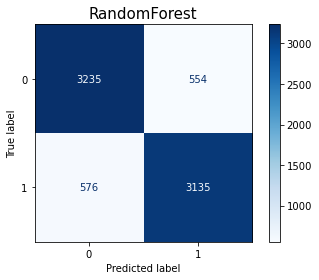

In [33]:
RF_acc1,RF_roc_auc1,RF_pr_auc1,RF_fpr1, RF_tpr1,RF_precision1, RF_recall1  = RF_model(train_data_features_array,test_data_features,y_train,y_test)

#### TF_IDF with RF

Fitting a random forest to labeled training data...
Finished fitting a random forest to labeled training data...
accuracy: 0.8552


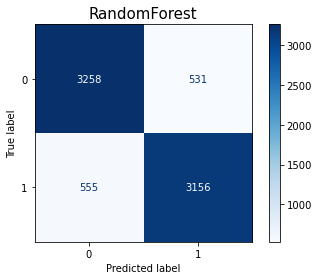

In [35]:
RF_acc2,RF_roc_auc2,RF_pr_auc2,RF_fpr2, RF_tpr2,RF_precision2, RF_recall2 = RF_model(train_data_features_array2,test_data_features2,y_train,y_test)

#### Word2Vec with  RF

Fitting a random forest to labeled training data...
Finished fitting a random forest to labeled training data...
accuracy: 0.8469333333333333


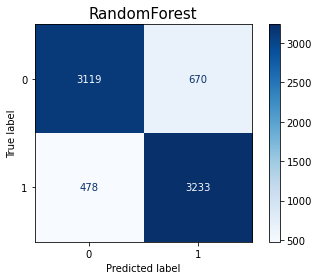

In [36]:
RF_acc3,RF_roc_auc3,RF_pr_auc3,RF_fpr3, RF_tpr3,RF_precision3, RF_recall3 = RF_model(train_data_features3,test_data_features3,y_train,y_test)

#### Plot ROC and PR curve

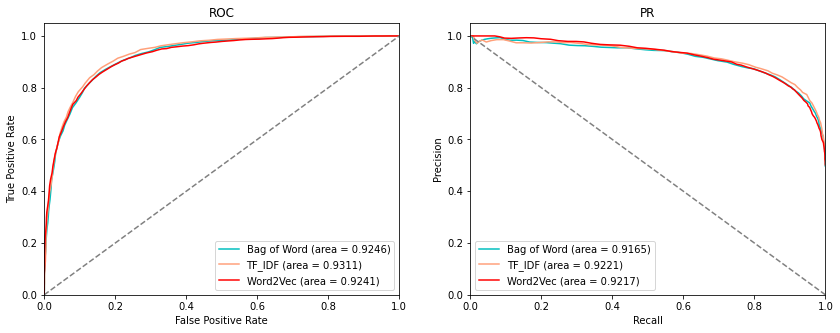

In [37]:
fig = plt.figure(figsize=(14,5))
roc = fig.add_subplot(121)
pr = fig.add_subplot(122)

roc.plot(RF_fpr1, RF_tpr1, color='c',
         label='Bag of Word (area = %0.4f)' % RF_roc_auc1) 

roc.plot(RF_fpr2, RF_tpr2, color='lightsalmon',
         label='TF_IDF (area = %0.4f)' % RF_roc_auc2) 

roc.plot(RF_fpr3, RF_tpr3, color='r',
         label='Word2Vec (area = %0.4f)' % RF_roc_auc3) 
# roc.plot(DT_fpr, DT_tpr, color='lightsalmon',
#          label='DT_ROC curve (area = %0.4f)' % DT_roc_auc)
roc.plot([0, 1], [0, 1], color='grey', linestyle='--')
roc.set(xlim=[0.0,1.0],ylim=[0.0,1.05],xlabel='False Positive Rate',
        ylabel='True Positive Rate',title='ROC')
roc.legend(loc="lower right")



pr.plot(RF_recall1, RF_precision1, color='c',
         label='Bag of Word (area = %0.4f)' % RF_pr_auc1)


pr.plot(RF_recall2, RF_precision2, color='lightsalmon',
         label='TF_IDF (area = %0.4f)' % RF_pr_auc2)

pr.plot(RF_recall3, RF_precision3, color='r',
         label='Word2Vec (area = %0.4f)' % RF_pr_auc3)
# pr.plot(DT_recall, DT_precision,  color='lightsalmon',
#          label='DT_PR curve (area = %0.4f)' % DT_pr_auc)
pr.plot([1, 0], [0, 1], color='grey',linestyle='--')
pr.set(xlim=[0.0,1.0],ylim=[0.0,1.05],xlabel='Recall',
        ylabel='Precision',title='PR')
pr.legend(loc="lower left")

# plt.savefig('./image/ROCandPR.png')
plt.show()

### SVM  Classifier

In [38]:
def SVM_model(x_train, x_test, y_train, y_test):
    svm = SVC(kernel="rbf",verbose=True,probability=True)
    print("Fitting a SVM to labeled training data...")
    svm = svm.fit(x_train, y_train)
    print("Finished fitting a SVM to labeled training data...")
    # Test & extract results 
    result = svm.predict(x_test)
    acc = accuracy_score(y_test,result)
    print("accuracy:",acc)
    SVM_proba = svm.predict_proba(x_test)
    plot_confusion_matrix(svm, x_test, y_test,cmap='Oranges') 
    plt.title('SVM',fontsize=15)

#     plt.savefig('./image/RF_confusion.png')
    plt.show()
    
    SVM_fpr, SVM_tpr, SVM_thresholds  =  roc_curve(y_test, SVM_proba[:, 1]) 
    SVM_roc_auc = auc(SVM_fpr,SVM_tpr)
    SVM_precision, SVM_recall, SVM_pthresholds = precision_recall_curve(y_test, SVM_proba[:, 1])
    SVM_pr_auc = auc(SVM_recall, SVM_precision)
    
    return acc,SVM_roc_auc,SVM_pr_auc,SVM_fpr, SVM_tpr,SVM_precision, SVM_recall

#### BOW with SVM

Fitting a SVM to labeled training data...
[LibSVM]Finished fitting a SVM to labeled training data...
accuracy: 0.8686666666666667


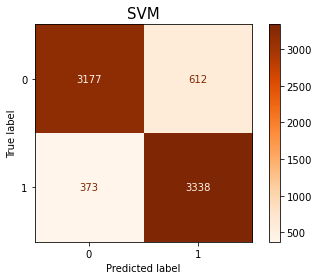

In [39]:
SVM_acc1,SVM_roc_auc1,SVM_pr_auc1,SVM_fpr1, SVM_tpr1,SVM_precision1, SVM_recall1  = SVM_model(train_data_features_array,test_data_features,y_train,y_test)

#### TF_IDF with SVM

Fitting a SVM to labeled training data...
[LibSVM]Finished fitting a SVM to labeled training data...
accuracy: 0.8861333333333333


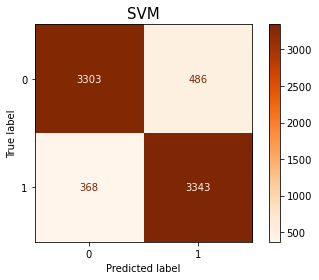

In [41]:
SVM_acc2,SVM_roc_auc2,SVM_pr_auc2,SVM_fpr2, SVM_tpr2,SVM_precision2, SVM_recall2  = SVM_model(train_data_features_array2,test_data_features2,y_train,y_test)

#### Word2Vec with SVM

Fitting a SVM to labeled training data...
[LibSVM]Finished fitting a SVM to labeled training data...
accuracy: 0.8848


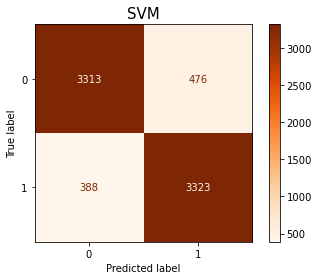

In [42]:
SVM_acc3,SVM_roc_auc3,SVM_pr_auc3,SVM_fpr3, SVM_tpr3,SVM_precision3, SVM_recall3  = SVM_model(train_data_features3,test_data_features3,y_train,y_test)

#### Plot ROC and PR curve

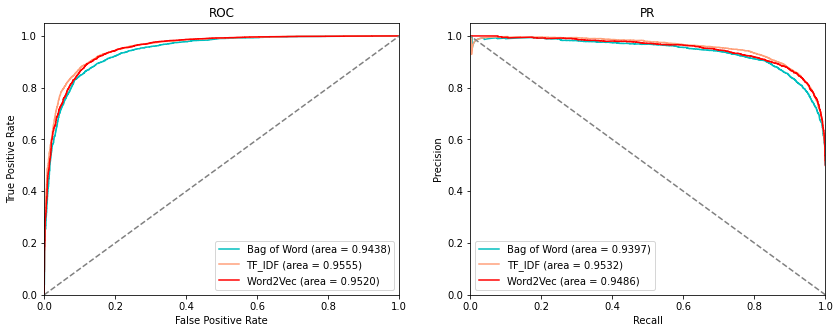

In [44]:
fig = plt.figure(figsize=(14,5))
roc = fig.add_subplot(121)
pr = fig.add_subplot(122)

roc.plot(SVM_fpr1, SVM_tpr1, color='c',
         label='Bag of Word (area = %0.4f)' % SVM_roc_auc1) 

roc.plot(SVM_fpr2, SVM_tpr2, color='lightsalmon',
         label='TF_IDF (area = %0.4f)' % SVM_roc_auc2) 

roc.plot(SVM_fpr3, SVM_tpr3, color='r',
         label='Word2Vec (area = %0.4f)' % SVM_roc_auc3) 

roc.plot([0, 1], [0, 1], color='grey', linestyle='--')
roc.set(xlim=[0.0,1.0],ylim=[0.0,1.05],xlabel='False Positive Rate',
        ylabel='True Positive Rate',title='ROC')
roc.legend(loc="lower right")



pr.plot(SVM_recall1, SVM_precision1, color='c',
         label='Bag of Word (area = %0.4f)' % SVM_pr_auc1)


pr.plot(SVM_recall2, SVM_precision2, color='lightsalmon',
         label='TF_IDF (area = %0.4f)' % SVM_pr_auc2)

pr.plot(SVM_recall3, SVM_precision3, color='r',
         label='Word2Vec (area = %0.4f)' % SVM_pr_auc3)

pr.plot([1, 0], [0, 1], color='grey',linestyle='--')
pr.set(xlim=[0.0,1.0],ylim=[0.0,1.05],xlabel='Recall',
        ylabel='Precision',title='PR')
pr.legend(loc="lower left")

plt.savefig('ROCandPR.png')
plt.show()

### Results of all trian data (test in kaggle)
#### Random forest 

In [49]:
forest = RandomForestClassifier(n_estimators = 100)

print("Fitting a random forest to labeled training data...")
forest = forest.fit(trainDataVecs, train_data["sentiment"])
print("Finished fitting a random forest to labeled training data...")

# Test & extract results 
result = forest.predict(testDataVecs)

# Write the test results 
output = pd.DataFrame(data={"id":test_data["id"], "sentiment":result})
output.to_csv("RF_W2V.csv", index=False, quoting=3)

Fitting a random forest to labeled training data...
Finished fitting a random forest to labeled training data...


In [57]:
def RF_pre(train_vec,test_vec):
    forest = RandomForestClassifier(n_estimators = 100)
    print("Fitting a random forest to labeled training data...")
    forest = forest.fit(train_vec, train_data["sentiment"])
    print("Finished fitting a random forest to labeled training data...")

    # Test & extract results 
    result = forest.predict(test_vec)

    return result

In [58]:
BOW_pre = RF_pre(all_train_data_features1,all_test_data_features1)
output = pd.DataFrame(data={"id":test_data["id"], "sentiment":BOW_pre})
output.to_csv("RF_BOW.csv", index=False, quoting=3)

Fitting a random forest to labeled training data...
Finished fitting a random forest to labeled training data...


In [ ]:
# BOW_RF Kaggle score: 0.84788

In [65]:
TFIDF_pre = RF_pre(all_train_data_features2,all_test_data_features2)
output = pd.DataFrame(data={"id":test_data["id"], "sentiment":TFIDF_pre})
output.to_csv("RF_TF.csv", index=False, quoting=3)

Fitting a random forest to labeled training data...
Finished fitting a random forest to labeled training data...


In [ ]:
# TF_IDF_RF Kaggle score: 0.84728

In [61]:
W2V_pre = RF_pre(trainDataVecs,testDataVecs)
output = pd.DataFrame(data={"id":test_data["id"], "sentiment":W2V_pre})
output.to_csv("RF_W2V.csv", index=False, quoting=3)

Fitting a random forest to labeled training data...
Finished fitting a random forest to labeled training data...


In [ ]:
# W2V_RF Kaggle score: 0.79100

#### SVM

In [67]:
def SVM_pre(train_vec,test_vec):
    svm = SVC(kernel="rbf",verbose=True,probability=True)
    print("Fitting a random forest to labeled training data...")
    svm = svm.fit(train_vec, train_data["sentiment"])
    print("Finished fitting a random forest to labeled training data...")

    # Test & extract results 
    result = svm.predict(test_vec)

    return result

In [68]:
BOW_pre2 = RF_pre(all_train_data_features1,all_test_data_features1)
output = pd.DataFrame(data={"id":test_data["id"], "sentiment":BOW_pre2})
output.to_csv("SVM_BOW.csv", index=False, quoting=3)

Fitting a random forest to labeled training data...
Finished fitting a random forest to labeled training data...


In [69]:
# BOW_SVM Kaggle score: 0.84800

In [70]:
TF_pre2 = RF_pre(all_train_data_features1,all_test_data_features1)
output = pd.DataFrame(data={"id":test_data["id"], "sentiment":TF_pre2})
output.to_csv("SVM_TF.csv", index=False, quoting=3)

Fitting a random forest to labeled training data...
Finished fitting a random forest to labeled training data...


In [71]:
# TF_IDF_SVM Kaggle score: 0.84964

In [72]:
W2V_pre2 = RF_pre(all_train_data_features1,all_test_data_features1)
output = pd.DataFrame(data={"id":test_data["id"], "sentiment":W2V_pre2})
output.to_csv("SVM_W2V.csv", index=False, quoting=3)

Fitting a random forest to labeled training data...
Finished fitting a random forest to labeled training data...


In [73]:
# W2V_SVM Kaggle score: 0.84832